<a href="https://colab.research.google.com/github/chetanlohia123/Electricity-bill-management/blob/main/music_popularity_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# ========================================
# BLOCK 1: Install and Import Libraries
# ========================================
!pip install pyspark -q

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")



✅ Libraries imported successfully!


In [7]:
# ========================================
# BLOCK 2: Load Dataset
# ========================================
# Upload your dataset.csv file to Colab or provide the path
from google.colab import files

# Uncomment the line below if you want to upload the file
# uploaded = files.upload()

# Load the dataset
data = pd.read_csv('dataset.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {data.shape}")
print(f"\nFirst 5 rows:")
data.head()



Dataset loaded successfully!
Shape: (114000, 21)

First 5 rows:


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [8]:
# ========================================
# BLOCK 3: Data Exploration
# ========================================
print("=" * 50)
print("DATA EXPLORATION")
print("=" * 50)

# Check data types
print("\n📊 Data Types:")
print(data.dtypes)

# Check for missing values
print("\n🔍 Missing Values:")
print(data.isnull().sum())

# Summary statistics
print("\n📈 Summary Statistics:")
print(data.describe())

# Check columns
print("\n📋 Column Names:")
print(data.columns.tolist())



DATA EXPLORATION

📊 Data Types:
Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

🔍 Missing Values:
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness 

In [9]:
# ========================================
# BLOCK 4: PySpark Setup (Optional Section)
# ========================================
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# Create Spark session
spark = (SparkSession.builder
         .appName("SpotifySparkHive")
         .config("spark.sql.warehouse.dir", "./spark_warehouse")
         .enableHiveSupport()
         .getOrCreate())

print("✅ Spark Session created successfully!")
print(f"Spark Version: {spark.version}")



✅ Spark Session created successfully!
Spark Version: 3.5.1


In [10]:
# ========================================
# BLOCK 5: Create Spark Database and Load Data
# ========================================
# Create database
spark.sql("CREATE DATABASE IF NOT EXISTS spotify_music")
spark.sql("USE spotify_music")

print("\n📁 Available Databases:")
spark.sql("SHOW DATABASES").show()

# Load data into Spark DataFrame
sp_read = spark.read.option("header", True).option("inferSchema", True).csv("dataset.csv")

print("\n📊 Spark DataFrame Schema:")
sp_read.printSchema()




📁 Available Databases:
+-------------+
|    namespace|
+-------------+
|      default|
|spotify_music|
+-------------+


📊 Spark DataFrame Schema:
root
 |-- _c0: integer (nullable = true)
 |-- track_id: string (nullable = true)
 |-- artists: string (nullable = true)
 |-- album_name: string (nullable = true)
 |-- track_name: string (nullable = true)
 |-- popularity: string (nullable = true)
 |-- duration_ms: string (nullable = true)
 |-- explicit: string (nullable = true)
 |-- danceability: string (nullable = true)
 |-- energy: string (nullable = true)
 |-- key: string (nullable = true)
 |-- loudness: string (nullable = true)
 |-- mode: string (nullable = true)
 |-- speechiness: string (nullable = true)
 |-- acousticness: string (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: string (nullable = true)
 |-- valence: string (nullable = true)
 |-- tempo: double (nullable = true)
 |-- time_signature: double (nullable = true)
 |-- track_genre: string (nullabl

In [11]:
# ========================================
# BLOCK 6: Convert Numeric Columns and Save to Hive
# ========================================
# Define numeric columns
numeric_cols = [
    "popularity", "duration_ms", "danceability", "energy",
    "loudness", "speechiness", "acousticness", "instrumentalness",
    "liveness", "valence", "tempo"
]

# Convert to double type
sp_new = sp_read
for col in numeric_cols:
    sp_new = sp_new.withColumn(col, F.col(col).cast("double"))

# Save as Hive table
sp_new.write.mode("overwrite").saveAsTable("spotify_tracks")

print("✅ Data saved to Hive table 'spotify_tracks'")
print("\nSample data from Hive table:")
spark.sql("SELECT * FROM spotify_tracks LIMIT 5").show()



✅ Data saved to Hive table 'spotify_tracks'

Sample data from Hive table:
+---+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+
|_c0|            track_id|             artists|          album_name|          track_name|popularity|duration_ms|explicit|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|time_signature|track_genre|
+---+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+
|  0|5SuOikwiRyPMVoIQD...|         Gen Hoshino|              Comedy|              Comedy|      73.0|   230666.0|   False|       0.676| 0.461|  1|  -6.746|   0|     

In [12]:
# ========================================
# BLOCK 7: Spark SQL Analysis - Average Danceability
# ========================================
print("\n🎵 Average Danceability:")
spark.sql("SELECT AVG(danceability) as avg_dance FROM spotify_tracks").show()


🎵 Average Danceability:
+------------------+
|         avg_dance|
+------------------+
|31.798216588376423|
+------------------+



In [13]:


# ========================================
# BLOCK 8: Genre Analysis - Danceability by Genre
# ========================================
print("\n💃 Danceability by Genre:")
q1 = spark.sql("""
SELECT track_genre,
       ROUND(AVG(danceability), 3) AS avg_dance,
       COUNT(*) AS n
FROM spotify_tracks
WHERE track_genre NOT RLIKE '^[0-9.\\-]+$'
GROUP BY track_genre
ORDER BY avg_dance DESC
LIMIT 15
""")
q1.show(truncate=False)




💃 Danceability by Genre:
+--------------+---------+----+
|track_genre   |avg_dance|n   |
+--------------+---------+----+
|kids          |0.779    |1000|
|chicago-house |0.766    |999 |
|reggaeton     |0.759    |1000|
|latino        |0.757    |1000|
|reggae        |0.745    |1000|
|hip-hop       |0.736    |1000|
|dancehall     |0.734    |1000|
|minimal-techno|0.729    |1000|
|detroit-techno|0.723    |1000|
|latin         |0.722    |1000|
|children      |0.716    |1000|
|deep-house    |0.71     |1000|
|sad           |0.692    |1000|
|dance         |0.688    |1000|
|study         |0.685    |1000|
+--------------+---------+----+




⚡ Top 10 Genres by Energy (with at least 100 tracks):
+-------------+----------+----+
|track_genre  |avg_energy|n   |
+-------------+----------+----+
|death-metal  |0.931     |1000|
|grindcore    |0.924     |1000|
|metalcore    |0.914     |1000|
|happy        |0.911     |1000|
|hardstyle    |0.901     |1000|
|drum-and-bass|0.877     |1000|
|black-metal  |0.875     |1000|
|heavy-metal  |0.874     |1000|
|party        |0.871     |1000|
|j-idol       |0.869     |1000|
+-------------+----------+----+



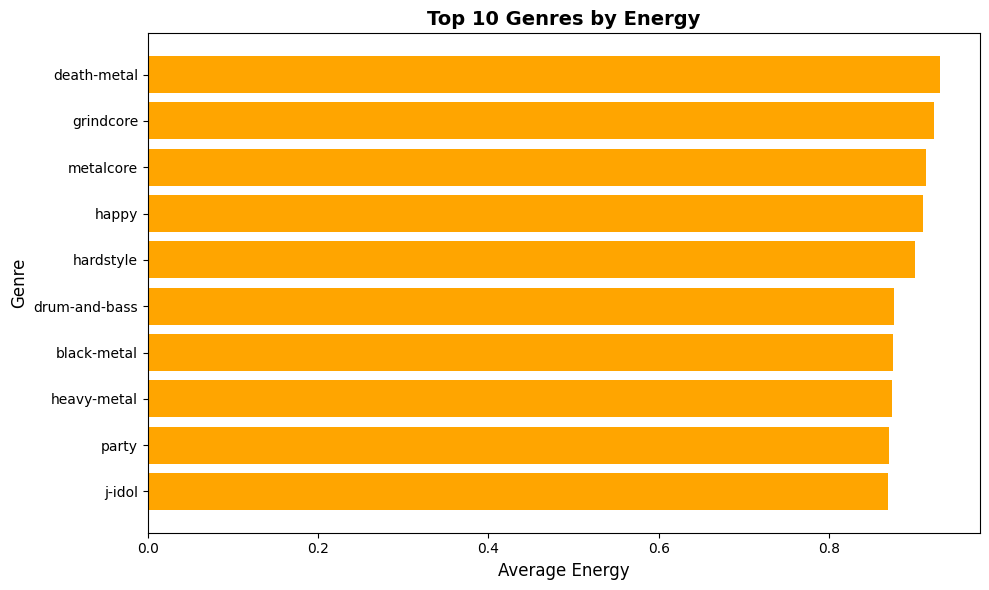

In [14]:
# ========================================
# BLOCK 9: Top 10 Genres by Energy
# ========================================
print("\n⚡ Top 10 Genres by Energy (with at least 100 tracks):")
q2 = spark.sql("""
SELECT track_genre,
       ROUND(AVG(energy), 3) AS avg_energy,
       COUNT(*) AS n
FROM spotify_tracks
WHERE track_genre NOT RLIKE '^[0-9.\\-]+$'
GROUP BY track_genre
HAVING n >= 100
ORDER BY avg_energy DESC
LIMIT 10
""")
q2.show(truncate=False)

# Convert to Pandas for visualization
pdf2 = q2.toPandas()

plt.figure(figsize=(10, 6))
plt.barh(pdf2["track_genre"], pdf2["avg_energy"], color="orange")
plt.xlabel("Average Energy", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.title("Top 10 Genres by Energy", fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



🔊 Correlation between Loudness and Energy:
+-----+
| corr|
+-----+
|0.007|
+-----+



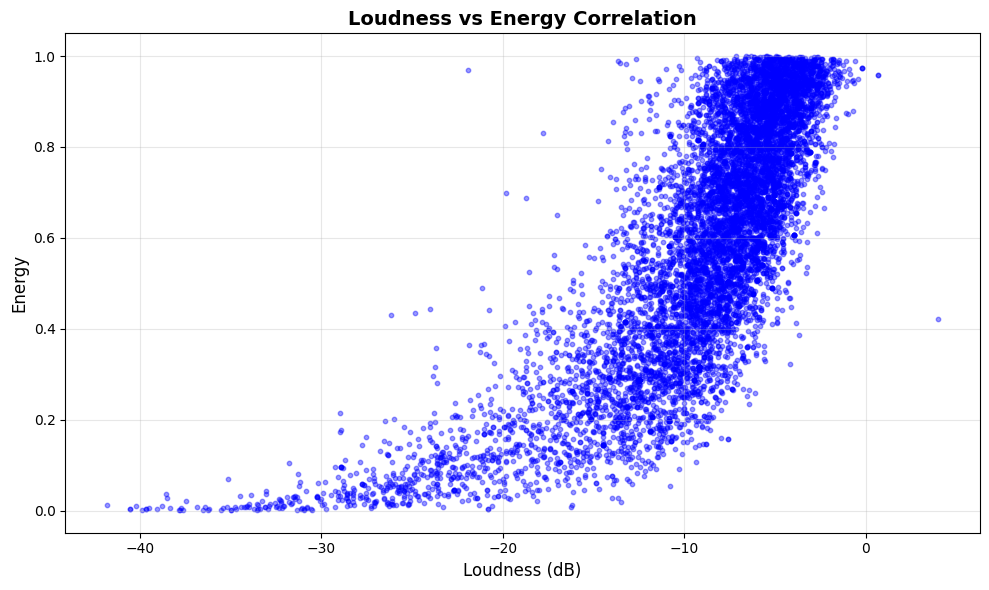

In [15]:

# ========================================
# BLOCK 10: Correlation Analysis - Loudness vs Energy
# ========================================
print("\n🔊 Correlation between Loudness and Energy:")
q4 = spark.sql("SELECT ROUND(CORR(loudness, energy), 3) AS corr FROM spotify_tracks")
q4.show()

# Get data for scatter plot
pdf4 = spark.sql("""
SELECT loudness, energy
FROM spotify_tracks
WHERE loudness IS NOT NULL AND energy IS NOT NULL
LIMIT 10000
""").toPandas()

plt.figure(figsize=(10, 6))
plt.scatter(pdf4["loudness"], pdf4["energy"], alpha=0.4, s=10, color='blue')
plt.title("Loudness vs Energy Correlation", fontsize=14, fontweight='bold')
plt.xlabel("Loudness (dB)", fontsize=12)
plt.ylabel("Energy", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [16]:

# ========================================
# BLOCK 11: Prepare Data for Machine Learning
# ========================================
print("\n" + "=" * 50)
print("MACHINE LEARNING MODEL")
print("=" * 50)

# Select relevant features
features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence',
    'tempo', 'duration_ms'
]

# Drop rows with missing values in features or target
data_clean = data.dropna(subset=features + ['popularity'])

print(f"\n📊 Dataset shape after cleaning: {data_clean.shape}")
print(f"Removed {len(data) - len(data_clean)} rows with missing values")

# Define features (X) and target (y)
X = data_clean[features]
y = data_clean['popularity']

print(f"\n🎯 Target variable (popularity) statistics:")
print(y.describe())




MACHINE LEARNING MODEL

📊 Dataset shape after cleaning: (114000, 21)
Removed 0 rows with missing values

🎯 Target variable (popularity) statistics:
count    114000.000000
mean         33.238535
std          22.305078
min           0.000000
25%          17.000000
50%          35.000000
75%          50.000000
max         100.000000
Name: popularity, dtype: float64


In [17]:
# ========================================
# BLOCK 12: Train-Test Split
# ========================================
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\n✂️ Data Split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


✂️ Data Split:
Training set: 91200 samples
Test set: 22800 samples


In [18]:


# ========================================
# BLOCK 13: Train Random Forest Model
# ========================================
print("\n🌲 Training Random Forest Regressor...")

# Train the model
model = RandomForestRegressor(
    n_estimators=200,      # Increased from 100
    max_depth=20,          # Added depth limit
    min_samples_split=5,   # Prevent overfitting
    random_state=42,
    n_jobs=-1              # Use all CPU cores
)

model.fit(X_train, y_train)

print("✅ Model trained successfully!")


🌲 Training Random Forest Regressor...
✅ Model trained successfully!


In [19]:


# ========================================
# BLOCK 14: Model Evaluation
# ========================================
# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n" + "=" * 50)
print("MODEL PERFORMANCE METRICS")
print("=" * 50)
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("\n📊 Interpretation:")
print(f"The model explains {r2*100:.2f}% of the variance in song popularity")
print(f"On average, predictions are off by ±{mae:.2f} popularity points")



MODEL PERFORMANCE METRICS
R² Score: 0.4599
Mean Absolute Error (MAE): 12.59
Root Mean Squared Error (RMSE): 16.33

📊 Interpretation:
The model explains 45.99% of the variance in song popularity
On average, predictions are off by ±12.59 popularity points


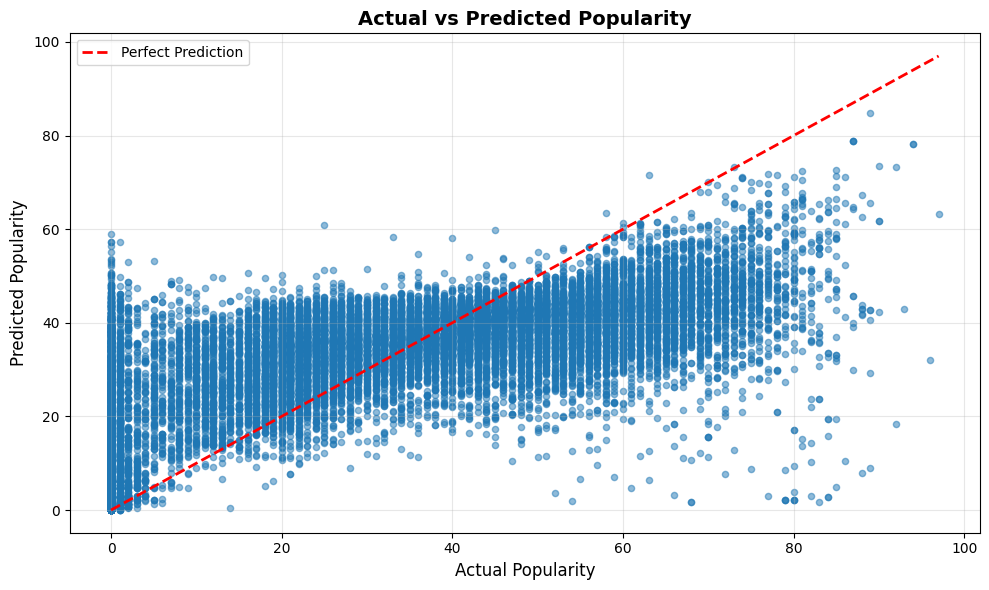

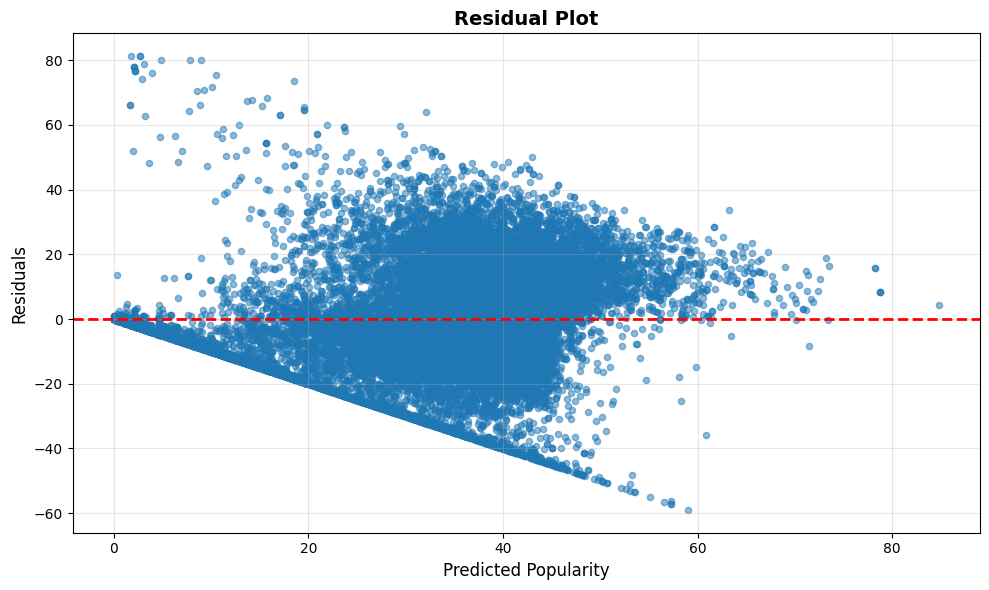

In [20]:

# ========================================
# BLOCK 15: Visualize Predictions
# ========================================
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Popularity", fontsize=12)
plt.ylabel("Predicted Popularity", fontsize=12)
plt.title("Actual vs Predicted Popularity", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, s=20)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel("Predicted Popularity", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.title("Residual Plot", fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()




📊 Feature Importance:
            feature  importance
4      acousticness    0.115172
0      danceability    0.108032
9       duration_ms    0.106510
7           valence    0.105015
8             tempo    0.103797
3       speechiness    0.102441
2          loudness    0.099870
1            energy    0.093843
6          liveness    0.086887
5  instrumentalness    0.078433


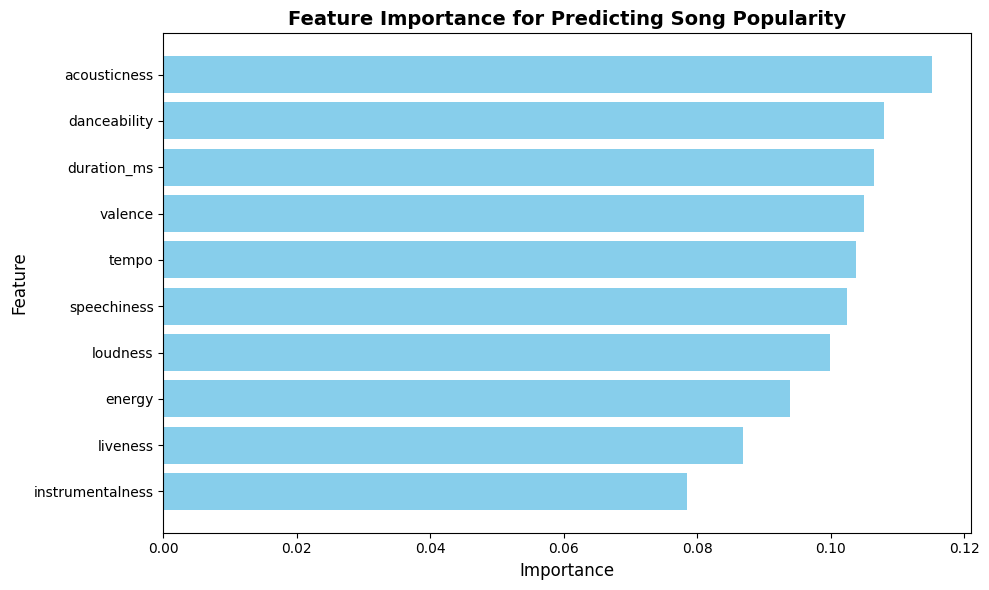

In [21]:
# ========================================
# BLOCK 16: Feature Importance Analysis
# ========================================
# Get feature importance
importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n📊 Feature Importance:")
print(importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance['feature'], importance['importance'], color='skyblue')
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("Feature Importance for Predicting Song Popularity", fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [24]:

# ========================================
# BLOCK 17: Predict Popularity for New Song
# ========================================
print("\n" + "=" * 50)
print("PREDICTING NEW SONG POPULARITY")
print("=" * 50)

# Example: High-popularity song characteristics
high_pop_song = pd.DataFrame({
    'danceability': [0.78],
    'energy': [0.88],
    'loudness': [-4.0],
    'speechiness': [0.04],
    'acousticness': [0.02],
    'instrumentalness': [0.0],
    'liveness': [0.05],
    'valence': [0.80],
    'tempo': [123.0],
    'duration_ms': [200000]
})

predicted_popularity = model.predict(high_pop_song)

print("\n🎵 Example Song Characteristics:")
print(high_pop_song.T)
print(f"\n🎯 Predicted Popularity: {predicted_popularity[0]:.1f}/100")

# Example: Low-popularity song characteristics
low_pop_song = pd.DataFrame({
    'danceability': [0.35],
    'energy': [0.25],
    'loudness': [-15.0],
    'speechiness': [0.60],
    'acousticness': [0.85],
    'instrumentalness': [0.80],
    'liveness': [0.10],
    'valence': [0.20],
    'tempo': [80.0],
    'duration_ms': [450000]
})

predicted_popularity_low = model.predict(low_pop_song)

print("\n🎵 Example Low-Popularity Song Characteristics:")
print(low_pop_song.T)
print(f"\n🎯 Predicted Popularity: {predicted_popularity_low[0]:.1f}/100")


PREDICTING NEW SONG POPULARITY

🎵 Example Song Characteristics:
                          0
danceability           0.78
energy                 0.88
loudness              -4.00
speechiness            0.04
acousticness           0.02
instrumentalness       0.00
liveness               0.05
valence                0.80
tempo                123.00
duration_ms       200000.00

🎯 Predicted Popularity: 34.5/100

🎵 Example Low-Popularity Song Characteristics:
                          0
danceability           0.35
energy                 0.25
loudness             -15.00
speechiness            0.60
acousticness           0.85
instrumentalness       0.80
liveness               0.10
valence                0.20
tempo                 80.00
duration_ms       450000.00

🎯 Predicted Popularity: 13.8/100


In [23]:


# ========================================
# BLOCK 18: Save Model (Optional)
# ========================================
import pickle

# Save the trained model
with open('spotify_popularity_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("\n✅ Model saved as 'spotify_popularity_model.pkl'")

# To load later:
# with open('spotify_popularity_model.pkl', 'rb') as f:
#     loaded_model = pickle.load(f)

print("\n" + "=" * 50)
print("🎉 ANALYSIS COMPLETE!")
print("=" * 50)


✅ Model saved as 'spotify_popularity_model.pkl'

🎉 ANALYSIS COMPLETE!
